In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [3]:
consumer_key="AThItYOsXvGxe4GCCAUtutyyd"
consumer_scret="EvrYXzKnu9OSmtUKais2uxUag6Cp1zjpXJVpM3sEOVkF38k9yq"
access_token="1377948754658009093-aoIkJ39y9nyofErSYekC0t9Jt6h0tB"
access_token_scret="LGXVElTiHn7LBlozfYJTyFw9IQrU7OZHgA3NEoAoeQjUA"

In [4]:
auth=tw.OAuthHandler(consumer_key,consumer_scret)
auth.set_access_token(access_token,access_token_scret)
api=tw.API(auth,wait_on_rate_limit=True)

In [9]:
search_words="covid19"
date_since="2020-11-01"

In [10]:
tweets=tw.Cursor(api.search,q=search_words,lang="en",since=date_since).items(1000)


In [11]:
all_tweets = [tweet.text for tweet in tweets]

all_tweets[:10]

['RT @AnisPFI: Everyday there is news of aid coming from abroad..the only concern is whether it is reaching to the needy..\n\nThe government sh…',
 'Under Home Isolation?\nNo need to feel anxious or depressed. Consult our panel of expert doctors who will talk to yo… https://t.co/WLJLqlBAHQ',
 "RT @cheater_hoo: Court : If Delhi government is unable to control Covid19 we'll tell Central government to takeover.\n\nLe Modiji: https://t.…",
 'RT @PHE_uk: The Joint Committee on Vaccination and Immunisation (JCVI) has issued advice to the UK government on the use of the #COVID19 Ox…',
 '#COVID19 curfew to be imposed in #Goa from May 9 to May 23. Essential services including medical supplies allowed.… https://t.co/Sa9lLVwT4e',
 '🚀Countdown is starting: 1 week to go till precautionary quarantine before our #Polarstern cruise #PS126.Really look… https://t.co/xU5OnG0dVX',
 'RT @TompkinsHealth: Updated Table: 6 new positive cases, 11 released, 49 active cases, 3 hospitalized. \n\nEveryone ages 16+

In [12]:
new_search_words=search_words+"-filter:retweets"
date_since="2020-11-01"
tweets=tw.Cursor(api.search,q=new_search_words,lang="en",since=date_since).items(1000)

In [1]:
all_tweets1 = [tweet.text for tweet in tweets]

all_tweets1[:200]

NameError: name 'tweets' is not defined

In [14]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())
print("dsdssdsds")

dsdssdsds


In [15]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:10]

['RT AnisPFI Everyday there is news of aid coming from abroad the only concern is whether it is reaching to the needy The government sh',
 'Under Home Isolation No need to feel anxious or depressed Consult our panel of expert doctors who will talk to yo',
 'RT cheater hoo Court If Delhi government is unable to control Covid19 we ll tell Central government to takeover Le Modiji',
 'RT PHE uk The Joint Committee on Vaccination and Immunisation JCVI has issued advice to the UK government on the use of the COVID19 Ox',
 'COVID19 curfew to be imposed in Goa from May 9 to May 23 Essential services including medical supplies allowed',
 'Countdown is starting 1 week to go till precautionary quarantine before our Polarstern cruise PS126 Really look',
 'RT TompkinsHealth Updated Table 6 new positive cases 11 released 49 active cases 3 hospitalized Everyone ages 16 can sign up on t',
 'RT tripura cmo To accommodate mild amp moderate COVID19 positive cases the Atal Bihari Vajpayee Regional Centre 

In [16]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'anispfi',
  'everyday',
  'there',
  'is',
  'news',
  'of',
  'aid',
  'coming',
  'from',
  'abroad',
  'the',
  'only',
  'concern',
  'is',
  'whether',
  'it',
  'is',
  'reaching',
  'to',
  'the',
  'needy',
  'the',
  'government',
  'sh'],
 ['under',
  'home',
  'isolation',
  'no',
  'need',
  'to',
  'feel',
  'anxious',
  'or',
  'depressed',
  'consult',
  'our',
  'panel',
  'of',
  'expert',
  'doctors',
  'who',
  'will',
  'talk',
  'to',
  'yo']]

In [17]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('rt', 829),
 ('covid19', 606),
 ('the', 587),
 ('of', 453),
 ('to', 433),
 ('in', 312),
 ('a', 290),
 ('and', 252),
 ('is', 176),
 ('at', 173),
 ('s', 163),
 ('blood', 160),
 ('for', 156),
 ('need', 146),
 ('amp', 127)]

In [18]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(15)

,words,count
0,rt,829
1,covid19,606
2,the,587
3,of,453
4,to,433
5,in,312
6,a,290
7,and,252
8,is,176
9,at,173


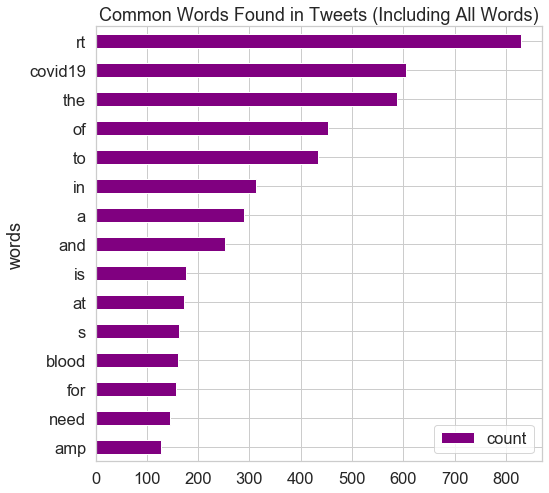

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:100]

["won't",
 'both',
 'once',
 'having',
 'how',
 'where',
 'myself',
 'doesn',
 'which',
 "needn't",
 'itself',
 'we',
 'themselves',
 'did',
 'above',
 'while',
 'if',
 "hasn't",
 "couldn't",
 'down',
 'shouldn',
 'below',
 'o',
 'i',
 'has',
 'but',
 'between',
 'ours',
 'are',
 'each',
 'nor',
 'hasn',
 'against',
 'd',
 "isn't",
 'yourselves',
 "hadn't",
 'at',
 'he',
 "mightn't",
 'these',
 'was',
 're',
 'of',
 'wouldn',
 'the',
 'for',
 'after',
 'too',
 'other',
 "shouldn't",
 'our',
 'then',
 "weren't",
 'an',
 'is',
 'himself',
 'her',
 'mustn',
 'y',
 'hers',
 'and',
 'over',
 "you're",
 'so',
 'aren',
 'his',
 'haven',
 'until',
 "wasn't",
 'from',
 'own',
 'do',
 'were',
 'now',
 'few',
 'll',
 "don't",
 "shan't",
 'weren',
 'those',
 'before',
 'yours',
 "that'll",
 'being',
 'him',
 'on',
 'couldn',
 "doesn't",
 'don',
 'through',
 'off',
 'further',
 'not',
 "mustn't",
 'no',
 "she's",
 'such',
 'it',
 'wasn']

In [22]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[1]

['home',
 'isolation',
 'need',
 'feel',
 'anxious',
 'depressed',
 'consult',
 'panel',
 'expert',
 'doctors',
 'talk',
 'yo']

In [23]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)


[('rt', 829),
 ('covid19', 606),
 ('blood', 160),
 ('need', 146),
 ('amp', 127),
 ('positive', 96),
 ('covid', 93),
 ('plasma', 77),
 ('type', 76),
 ('component', 75),
 ('blooddonorsin', 73),
 ('patient', 71),
 ('cases', 68),
 ('deaths', 61),
 ('india', 60)]

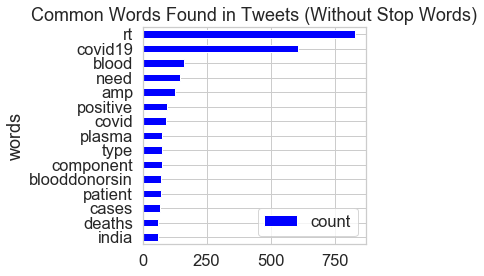

In [24]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(4, 4))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()